Sabrina Araújo nUSP 12566182

MAC0417 - EP1

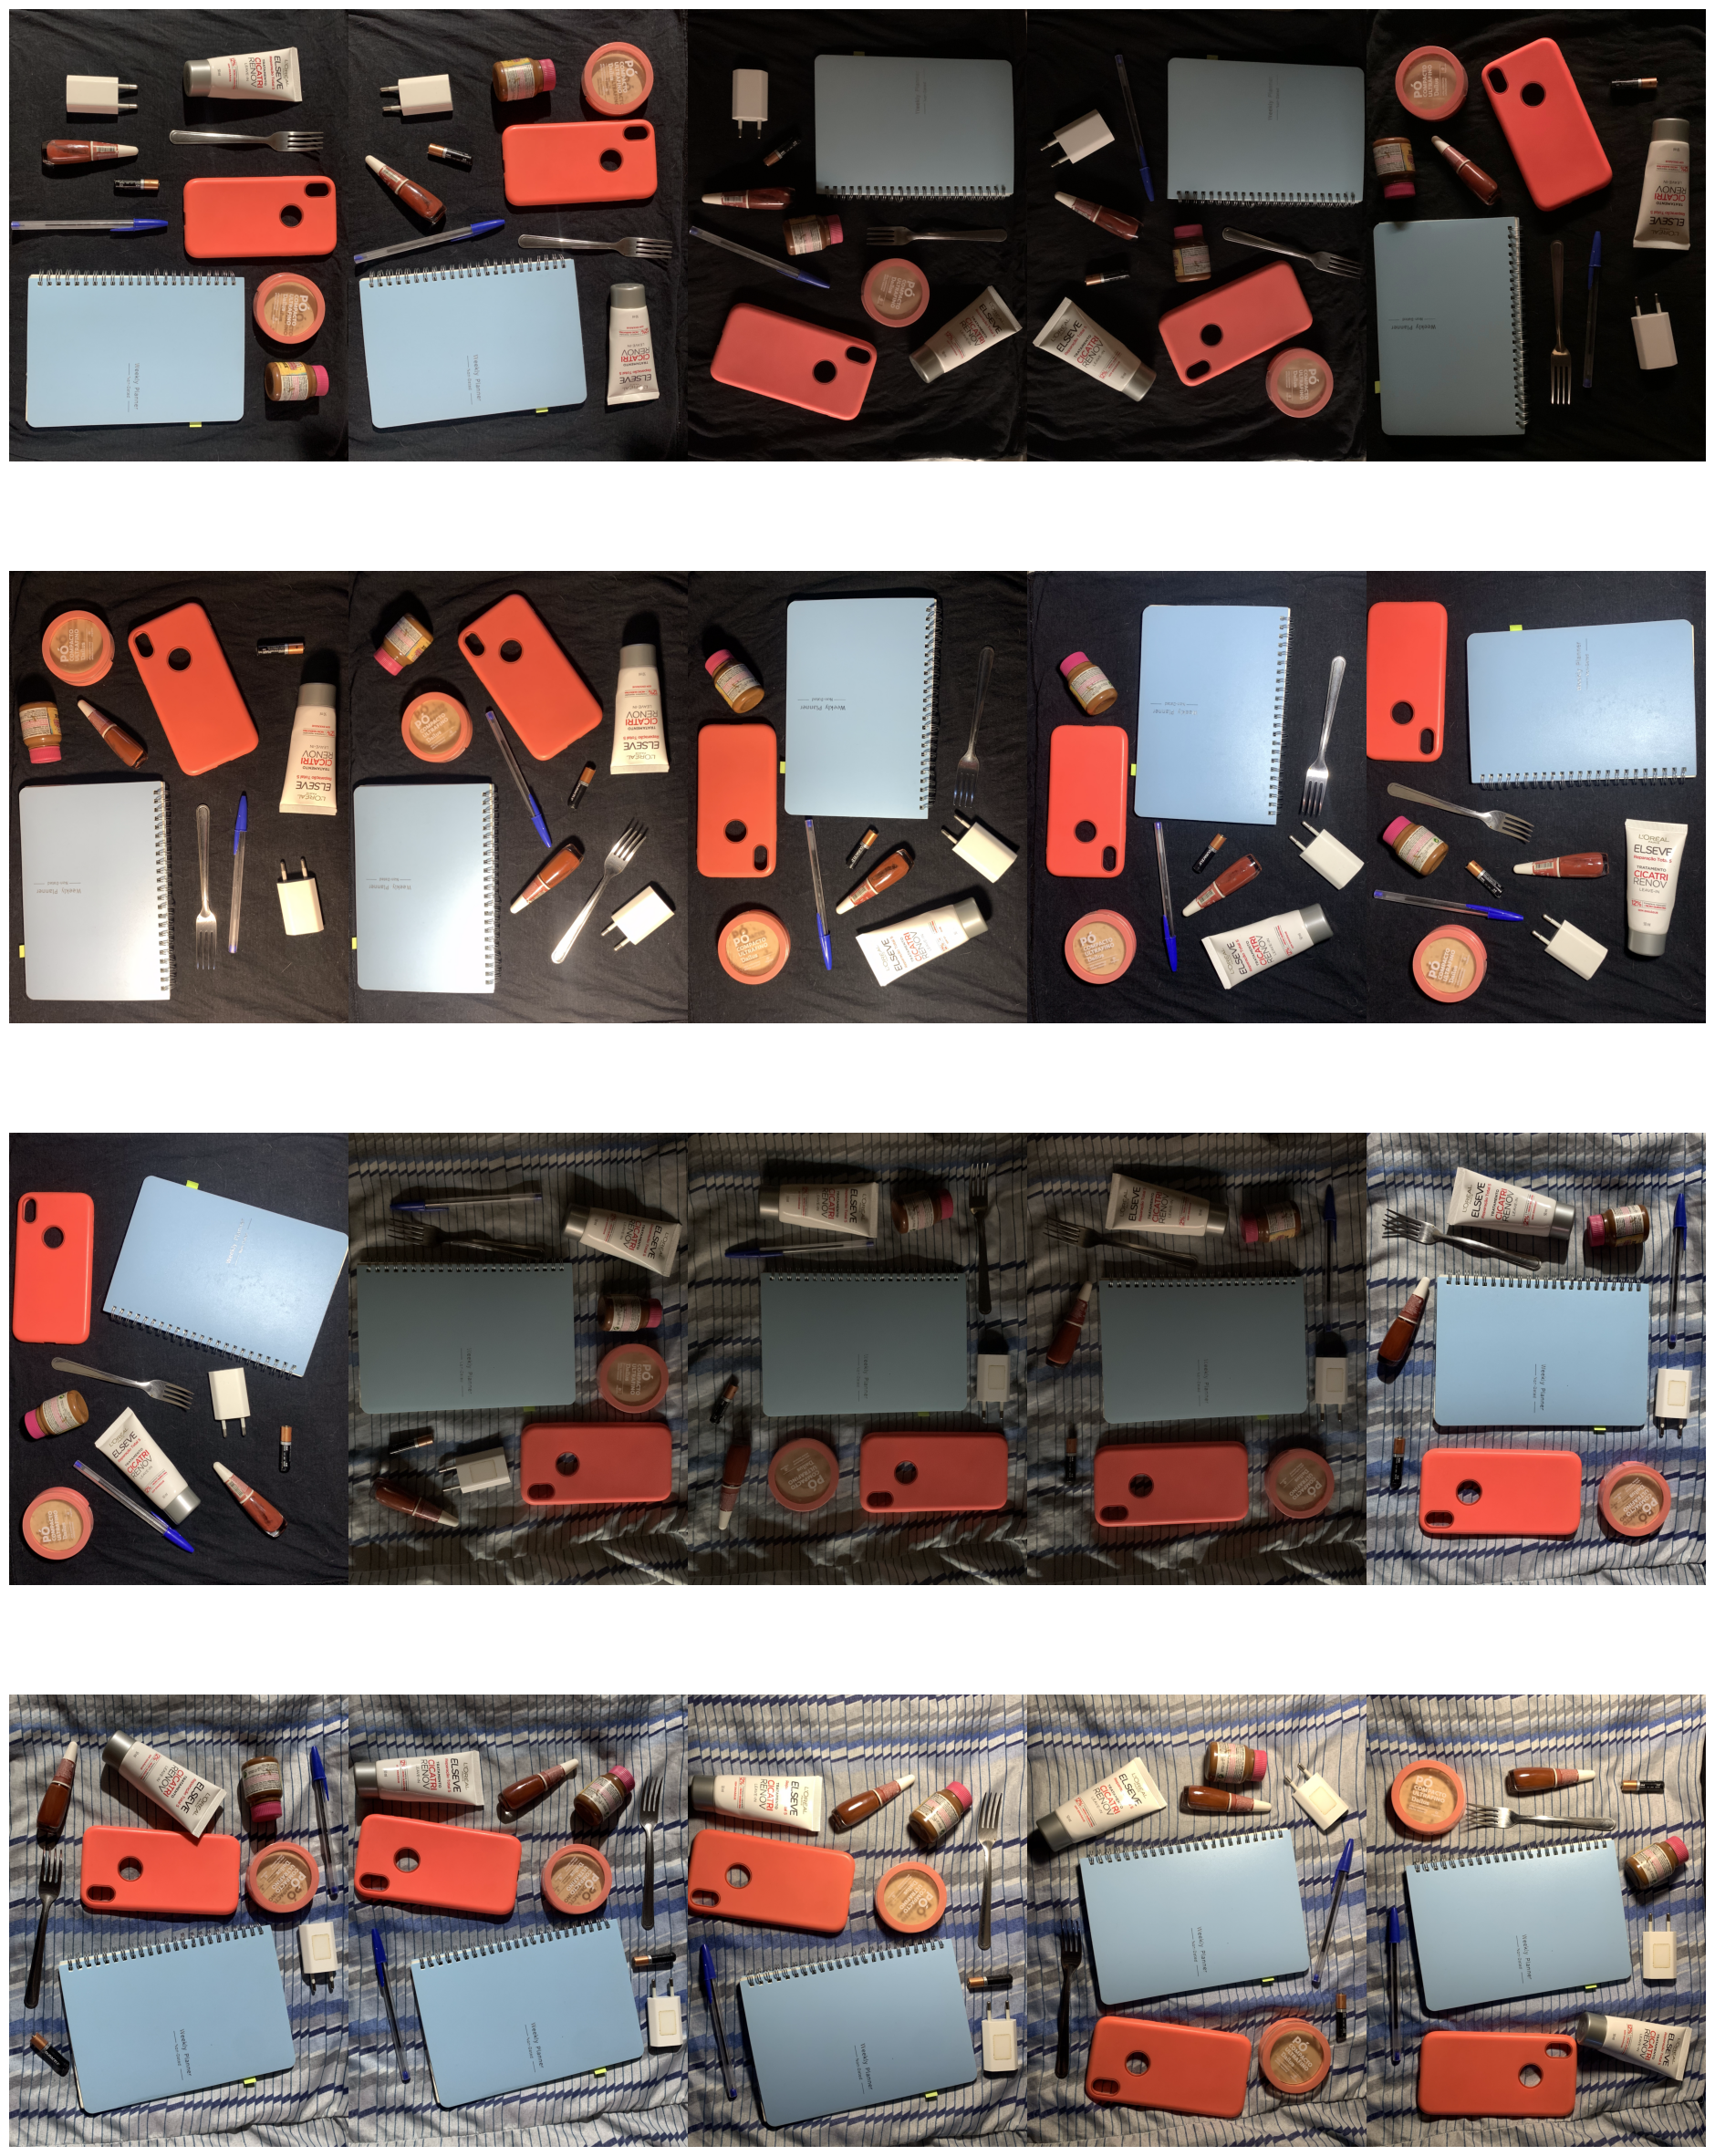


Tabela Global Sumária:
● Nome das classes: caneta, caderno, garfo, creme, esmalte, capinha, maquiagem, pilha, tinta, carregador
● Número de classes: 10
● Número de imagens: 104
● Tamanho da base (bytes): 1100.076 MB
● Resolução das imagens: 3024 linhas por 4032 colunas

  Nome da classe  Número de objetos           Variações de fundo  \
0         caneta                  3  3 (branco, preto, colorido)   
1        caderno                  3  3 (branco, preto, colorido)   
2          garfo                  3  3 (branco, preto, colorido)   
3          creme                  3  3 (branco, preto, colorido)   
4        esmalte                  3  3 (branco, preto, colorido)   
5        capinha                  3  3 (branco, preto, colorido)   
6      maquiagem                  3  3 (branco, preto, colorido)   
7          pilha                  3  3 (branco, preto, colorido)   
8          tinta                  3  3 (branco, preto, colorido)   
9     carregador                  3  3 (branco, 

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def le_csv(arquivo):
    dados = pd.read_csv(arquivo, delimiter=';')
    return dados

def visualiza_base(pasta_dataset, lote=10):
    imagens = os.listdir(pasta_dataset)
    
    colunas = 5
    linhas = (lote + colunas - 1) // colunas
    
    for i in range(0, min(len(imagens), lote), lote):
        plt.figure(figsize=(24, 32))
        for j, arquivo in enumerate(imagens[i:i + lote], 1):
            caminho = os.path.join(pasta_dataset, arquivo)
            if os.path.isfile(caminho):
                imagem = mpimg.imread(caminho)
                plt.subplot(linhas, colunas, j)
                plt.imshow(imagem)
                plt.axis('off')

        plt.subplots_adjust(wspace=0, hspace=0)
        plt.show()

def tabela_sumaria(dados, pasta_dataset):
    numero_de_imagens = len(os.listdir(pasta_dataset))
    tamanho_da_base = 1153513350 / (1024 * 1024)
    resolucao = (3024, 4032)
    classes = dados.iloc[:, 3:13].stack().unique()
    numero_de_classes = len(classes)

    print("\n===================================")
    print("Tabela Global Sumária:")
    print("● Nome das classes:", ', '.join(classes))
    print("● Número de classes:", numero_de_classes)
    print("● Número de imagens:", numero_de_imagens)
    print("● Tamanho da base (bytes): {:.3f} MB".format(tamanho_da_base))
    print("● Resolução das imagens:", f'{resolucao[0]} linhas por {resolucao[1]} colunas')
    print("===================================\n")

def tabela_detalhada_por_classe(dados):
    tabela_detalhada = []

    for coluna in dados.columns:
        if coluna.startswith('Classe'):
            classe = dados[coluna].unique()[0]
            num_objetos = 3
            total_amostras = 105
            num_repeticoes = 3
            var_fundo = '3 (branco, preto, colorido)'
            var_iluminacao = '4 (todas as variações do produto cartesiano: {dentro de casa, fora de casa} X {de dia, de noite}'

            tabela_detalhada.append({
                'Nome da classe': classe,
                'Número de objetos': num_objetos,
                'Variações de fundo': var_fundo,
                'Variações de iluminação': var_iluminacao,
                'Número de repetições': num_repeticoes,
                'Total de amostras': total_amostras
            })

    return pd.DataFrame(tabela_detalhada)

visualiza_base('database', lote=20)
dados = le_csv('metadados.csv')
tabela_sumaria(dados, 'database')
print(tabela_detalhada_por_classe(dados))
